In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

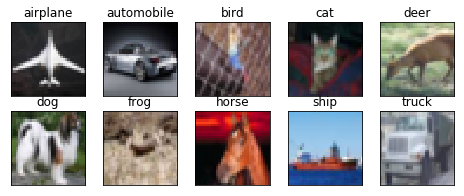

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0703 15:30:13.798294 140496180131712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0703 15:30:13.841980 140496180131712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 15:30:13.849025 140496180131712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0703 15:30:14.426930 140496180131712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 27s 70ms/step - loss: 1.6543 - acc: 0.3834 - val_loss: 1.3387 - val_acc: 0.5090
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.1533 - acc: 0.5825 - val_loss: 0.9804 - val_acc: 0.6517
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9360 - acc: 0.6656 - val_loss: 0.8656 - val_acc: 0.6934
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 0.7907 - acc: 0.7204 - val_loss: 0.7260 - val_acc: 0.7479
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.6926 - acc: 0.7560 - val_loss: 0.7830 - val_acc: 0.7362
Epoch 6/100
390/390 [==============================] - 20s 52ms/step - loss: 0.6131 - acc: 0.7838 - val_loss: 0.7395 - val_acc: 0.7552
Epoch 7/100
390/390 [==============================] - 20s 52ms/step - loss: 0.5574 - acc: 0.8056 - val_loss: 0.6741 - val_acc: 0.7738
Epoch 8/100
390/390 [==============================] - 

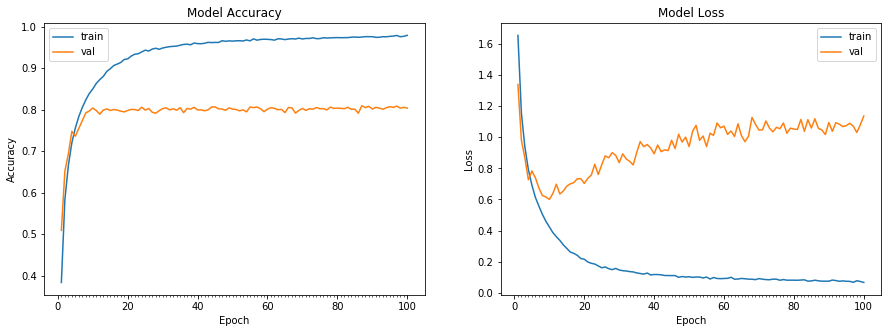

Accuracy on test data is: 80.39


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [11]:
 # Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',name='conv1', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3, name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='mp1'))
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same',name='conv3'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3,name='conv4'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='mp2'))
model.add(Dropout(0.25))
model.add(Convolution2D(196, 3, 3, border_mode='same',name='conv5'))
model.add(Activation('relu'))
model.add(Convolution2D(196, 3, 3,name='conv6'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 1, 1, border_mode='same',name='conv7'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 1, 1,name='conv8'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 1, 1,name='conv9'))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1,name='conv10'))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), name="conv1", input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), name="conv2")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), name="conv3", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), name="conv4")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(196, (3, 3), name="conv5", padding="same")`
  
/usr/local/lib/python3.6/dist

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 15, 15, 64)        18496     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
781/781 [==============================] - 23s 30ms/step - loss: 4.8592 - acc: 0.1187 - val_loss: 4.8867 - val_acc: 0.1000
Epoch 2/100
781/781 [==============================] - 22s 28ms/step - loss: 2.6241 - acc: 0.1027 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/100
781/781 [==============================] - 22s 28ms/step - loss: 2.2174 - acc: 0.1389 - val_loss: 1.9470 - val_acc: 0.1866
Epoch 4/100
781/781 [==============================] - 22s 29ms/step - loss: 1.9086 - acc: 0.2453 - val_loss: 1.8033 - val_acc: 0.2986
Epoch 5/100
781/781 [==============================] - 23s 29ms/step - loss: 1.9120 - acc: 0.2523 - val_loss: 1.8172 - val_acc: 0.2791
Epoch 6/100
781/781 [==============================] - 23s 30ms/step - loss: 1.7692 - acc: 0.3265 - val_loss: 1.6348 - val_acc: 0.3920
Epoch 7/100
781/781 [==============================] - 23s 30ms/step - loss: 1.7915 - acc: 0.3368 - val_loss: 1.7383 - val_acc: 0.3432
Epoch 8/100
781/781 [==============================] - 

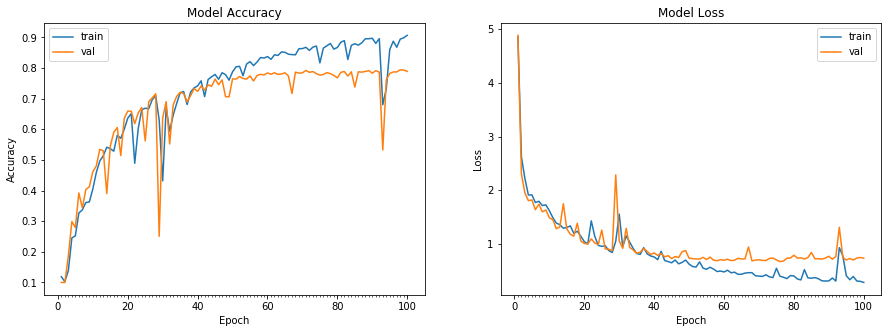

Accuracy on test data is: 78.88


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#import cv2
#img1 = cv2.imread('gdrive/My Drive/Colab Notebooks/Cifar10')
model.save('my_model.h5')

In [24]:
import numpy as np
from keras.preprocessing import image
imgs = train_features[15]
x = train_features[15]
x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = datagen.standardize(x)
#cv2.imwrite('imagess.jpg',x)
# convert class labels to binary class labels
preds = model.predict(x)
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_output)
last_conv_layer = model.get_layer("conv10")

[[1.7145808e+03 3.1614550e+01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6018665e+02 6.2767598e+04]]
Tensor("strided_slice_2:0", shape=(?,), dtype=float32)


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [0]:
 import cv2
from keras.preprocessing import image

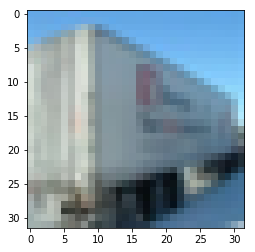

In [28]:
from PIL import Image
from keras.preprocessing import image
#imgg = Image.fromarray(test_features[15],"RGB")
#imgg.save("images.jpg")
cv2.imwrite('images.jpg',test_features[15])
imgg = cv2.imread('images.jpg')
#imgg = np.array(imgg)
heatmap = cv2.resize(heatmap, (imgg.shape[1], imgg.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET,)
img = Image.fromarray(test_features[15],"RGB")
plt.imshow(img)
img.save("img1.jpg")
img = cv2.imread('img1.jpg')
plt.imshow(imgs)
superimposed_img = cv2.addWeighted(imgs, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)

W0703 16:49:01.172692 140496180131712 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


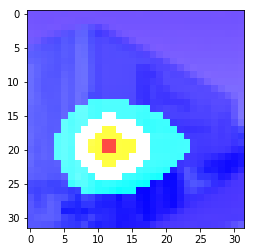

In [34]:
# image = cv2.resize(superimposed_img,(150, 150))
# cv2_imshow(image)
#plt.imshow(superimposed_img)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

[[6.0954506e+01 1.0662507e+00 1.4857470e+00 6.6974533e+01 6.0310562e+01
  6.9891777e+01 7.7472783e+03 4.9290531e+01 6.2564464e+00 6.0065329e-01]]
Tensor("strided_slice_8:0", shape=(?,), dtype=float32)


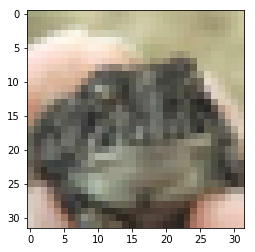

In [39]:
import numpy as np
from keras.preprocessing import image
imgs = train_features[25]
x = train_features[25]
x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = datagen.standardize(x)
#cv2.imwrite('imagess.jpg',x)
# convert class labels to binary class labels
preds = model.predict(x)
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_output)
last_conv_layer = model.get_layer("conv10")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import cv2
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing import image
#imgg = Image.fromarray(test_features[15],"RGB")
#imgg.save("images.jpg")
cv2.imwrite('images.jpg',test_features[15])
imgg = cv2.imread('images.jpg')
#imgg = np.array(imgg)
heatmap = cv2.resize(heatmap, (imgg.shape[1], imgg.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET,)
img = Image.fromarray(test_features[15],"RGB")
plt.imshow(img)
img.save("img1.jpg")
img = cv2.imread('img1.jpg')
plt.imshow(imgs)
superimposed_img = cv2.addWeighted(imgs, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)

W0703 16:51:21.395711 140496180131712 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


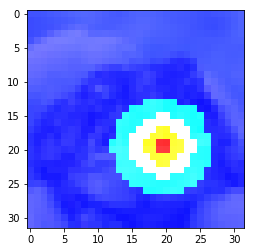

In [40]:
# image = cv2.resize(superimposed_img,(150, 150))
# cv2_imshow(image)
#plt.imshow(superimposed_img)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

[[1.9356408e+04 8.3055410e+00 1.9768865e+04 1.1708927e+01 3.4754457e+00
  6.7625895e+00 4.8709469e+00 3.9177490e+02 1.2912847e-01 1.9410715e+01]]
Tensor("strided_slice_10:0", shape=(?,), dtype=float32)


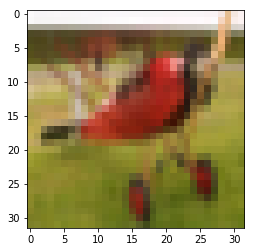

In [41]:
import numpy as np
from keras.preprocessing import image
imgs = train_features[35]
x = train_features[35]
x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = datagen.standardize(x)
#cv2.imwrite('imagess.jpg',x)
# convert class labels to binary class labels
preds = model.predict(x)
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_output)
last_conv_layer = model.get_layer("conv10")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import cv2
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing import image
#imgg = Image.fromarray(test_features[15],"RGB")
#imgg.save("images.jpg")
cv2.imwrite('images.jpg',test_features[15])
imgg = cv2.imread('images.jpg')
#imgg = np.array(imgg)
heatmap = cv2.resize(heatmap, (imgg.shape[1], imgg.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET,)
img = Image.fromarray(test_features[15],"RGB")
plt.imshow(img)
img.save("img1.jpg")
img = cv2.imread('img1.jpg')
plt.imshow(imgs)
superimposed_img = cv2.addWeighted(imgs, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)

W0703 16:52:19.272587 140496180131712 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


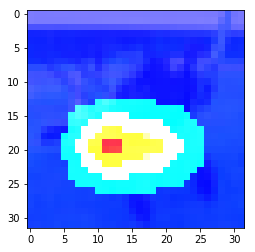

In [42]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

[[4.5712944e+01 2.0959909e+01 9.6448105e+01 3.8356422e+01 7.2995888e+01
  2.2204900e+00 1.7570338e+00 1.4917091e+02 5.5956165e+01 2.1282494e+04]]
Tensor("strided_slice_14:0", shape=(?,), dtype=float32)


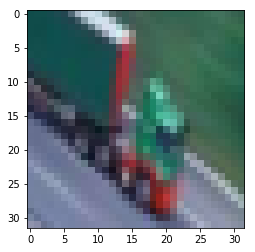

In [45]:
import numpy as np
from keras.preprocessing import image
imgs = train_features[50]
x = train_features[50]
x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = datagen.standardize(x)
#cv2.imwrite('imagess.jpg',x)
# convert class labels to binary class labels
preds = model.predict(x)
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_output)
last_conv_layer = model.get_layer("conv10")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import cv2
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing import image
#imgg = Image.fromarray(test_features[15],"RGB")
#imgg.save("images.jpg")
cv2.imwrite('images.jpg',test_features[15])
imgg = cv2.imread('images.jpg')
#imgg = np.array(imgg)
heatmap = cv2.resize(heatmap, (imgg.shape[1], imgg.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET,)
img = Image.fromarray(test_features[15],"RGB")
plt.imshow(img)
img.save("img1.jpg")
img = cv2.imread('img1.jpg')
plt.imshow(imgs)
superimposed_img = cv2.addWeighted(imgs, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)

W0703 16:53:14.179534 140496180131712 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


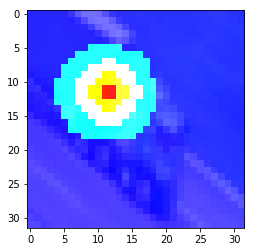

In [46]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

[[1.4240076e+02 1.0868255e+06 5.4618001e+00 0.0000000e+00 8.3409376e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9925194e+01 2.7781089e+03]]
Tensor("strided_slice_20:0", shape=(?,), dtype=float32)


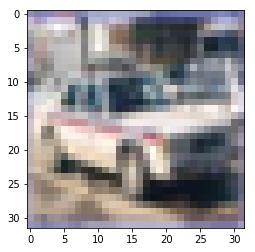

In [51]:
import numpy as np
from keras.preprocessing import image
imgs = train_features[65]
x = train_features[65]
x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = datagen.standardize(x)
#cv2.imwrite('imagess.jpg',x)
# convert class labels to binary class labels
preds = model.predict(x)
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
print(class_output)
last_conv_layer = model.get_layer("conv10")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import cv2
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing import image
#imgg = Image.fromarray(test_features[15],"RGB")
#imgg.save("images.jpg")
cv2.imwrite('images.jpg',test_features[15])
imgg = cv2.imread('images.jpg')
#imgg = np.array(imgg)
heatmap = cv2.resize(heatmap, (imgg.shape[1], imgg.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET,)
img = Image.fromarray(test_features[15],"RGB")
plt.imshow(img)
img.save("img1.jpg")
img = cv2.imread('img1.jpg')
plt.imshow(imgs)
superimposed_img = cv2.addWeighted(imgs, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)

W0703 16:54:12.750461 140496180131712 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


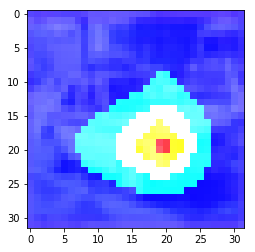

In [52]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))